In [ ]:

# Análisis Requeridos
# Obligatorios
# •	Segmentación de clientes, LISTO (juan tiene mejor info)
# •	Análisis RFM
# •	Customer Lifetime Value
# •	Análisis de tendencias, LISTO
# •	Revisión de métricas digitales actuales y de la competencia
# analisis de sentimiento, LISTO


<!-- Paso 1: Configuración del Entorno -->


In [5]:
# PASO 1: Primero lo que hacemos, configuramos el entorno y importamos los paquetes que vamos a necesitar por el momento, para luego seguir con el PASO 2 y cargar los datos para poder hacer una exploración de esta
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('netflix_titles.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [10]:
# PASO 3, vemos si es necesario una limpieza de datos, y segun los resultados que obtuvimos hay pocos valores nulos que a nuestro juicio no interfieren mucho pero aun asi vamos a reemplazarlo por "Desconocidos" para que no tengamos problemas futuros con eso a la hora de graficar o algo

# Información general del DataFrame
print("Información del DataFrame:")
print(df.info())

# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Revisar duplicados
print("\nCantidad de filas duplicadas:")
print(df.duplicated().sum())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      6128 non-null   float64       
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None

Valores nulos por columna:
show_id            0
type               0
title          

In [8]:
# Reemplazar valores nulos en columnas categóricas
df['director'].fillna('Desconocido', inplace=True)
df['cast'].fillna('Desconocido', inplace=True)
df['country'].fillna('Desconocido', inplace=True)
df['rating'].fillna('Desconocido', inplace=True)
df = df.dropna(subset=['date_added'])

df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


print(df.info())
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())

# Como dijimos anteriormente hicimos arreglos nulos y hacemos la verificación en este código, y ahora podemos seguir sin ningun problema, y cambiamos date_added tu tipo de dato y lo pusimos en datetime para poder hacer analisis temprales, como las épocas del año que más se ve

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      6128 non-null   float64       
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 893.4+ KB
None

Valores nulos después de la limpieza:
show_id            0
type               0
title              0
director

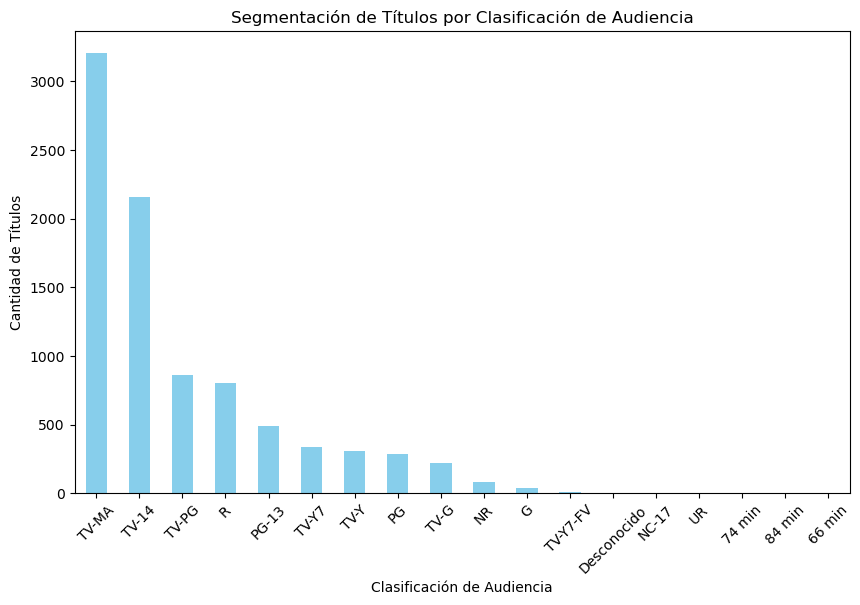

In [19]:
# Contar títulos por clasificación de edad
segmentacion_rating = df['rating'].value_counts()

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
segmentacion_rating.plot(kind='bar', color='skyblue', title='Segmentación de Títulos por Clasificación de Audiencia')
plt.xlabel('Clasificación de Audiencia')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)
plt.show()


# G → Público general (todas las edades).
# PG → Apta para menores con supervisión.
# PG-13 / TV-14 → Adolescentes y adultos jóvenes.
# R / TV-MA → Contenido para adultos.
# Se puede identificar cual es el segemtno que más titulos hay y ver en base una base más especifica como se puede mejorar y que tipo de títulos obtener

<Figure size 1000x600 with 0 Axes>

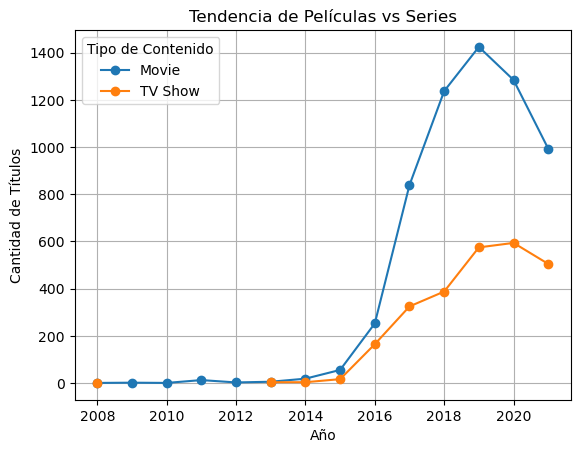

In [27]:
# En esta podemos ver la tendencia acerca de las series ANALISIS DE TENDENCIAAA
tendencia_tipo = df.dropna(subset=['date_added']).groupby([df['date_added'].dt.year, 'type']).size().unstack()

plt.figure(figsize=(10, 6))
tendencia_tipo.plot(kind='line', marker='o', title='Tendencia de Películas vs Series')
plt.xlabel('Año')
plt.ylabel('Cantidad de Títulos')
plt.legend(title='Tipo de Contenido')
plt.grid(True)
plt.show()


Top 10 géneros más populares en Netflix:
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


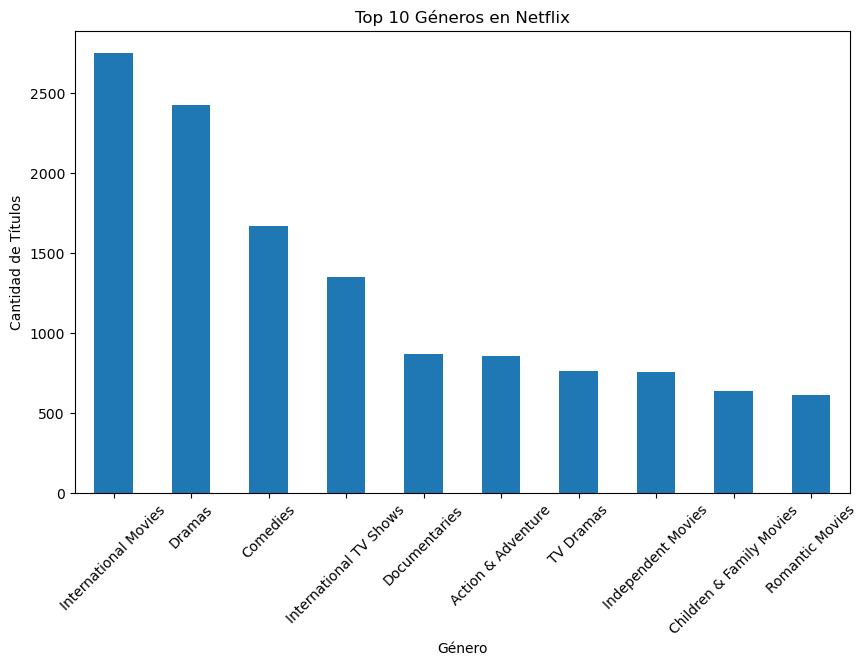

In [28]:
#  esto clave para Netflix, ya que sabe que genero es el más popular para proximas peliculas, y también lo que no son tanto para por ejemplo destinar más publicidad ahí o mejorar calidad de producción
segmentacion_genero = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

print("Top 10 géneros más populares en Netflix:")
print(segmentacion_genero.head(10))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
segmentacion_genero.head(10).plot(kind='bar', title='Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)
plt.show()
# Hacemos un Gráfico de barras para mostrarlo claro
# Analisis
# Algo importante a destacar es que InternationMovies, no es un generosino una etiqueta que Netflix segementa para identificar otro "target", que es producción internacional, que suelen estar distintios idiomas que en ignles, y peliculas que provienen de otros paises
# Sin embargo el "raninkg" uno lo podría tomar en cuenta desde "Dramas", ejemplo Roma :	Dramas, International Movies

Top 10 géneros más populares en Series de Netflix:
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64


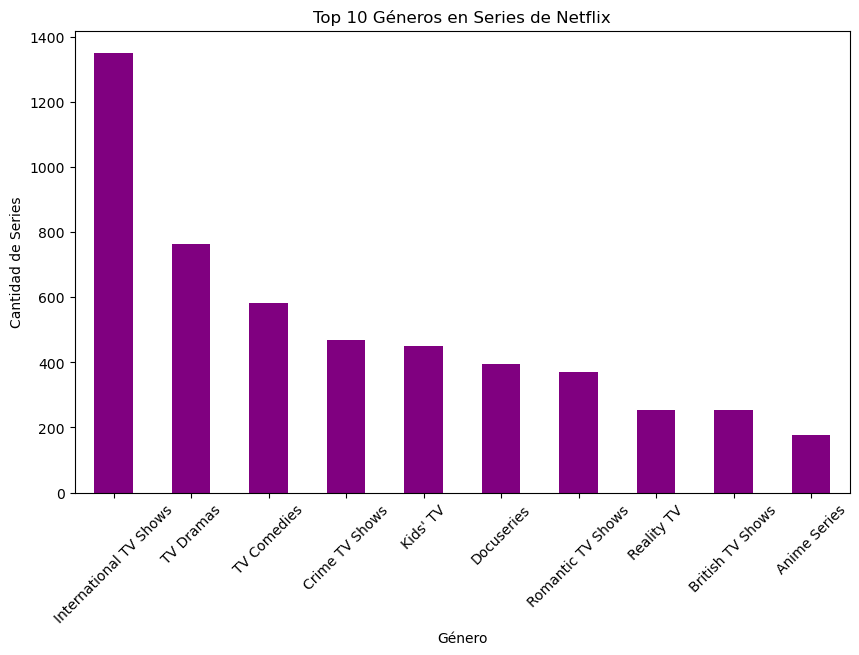

In [32]:
# Aqui mostramos algo bastante importante a lo hora de mostrar cuales son la mayor cantidad de titulos en Netflix y sus categorias, más abajo mostraremos lo mismo pero desglozandolo en series y peliculas, y ver cuales son las más subidas en Netflix
series = df[df['type'] == 'TV Show']

# Desglosar los géneros de las series y contar su frecuencia
generos_series = series['listed_in'].str.split(', ', expand=True).stack().value_counts()
print("Top 10 géneros más populares en Series de Netflix:")
print(generos_series.head(10))

# hacemos visualizacionn
plt.figure(figsize=(10, 6))
generos_series.head(10).plot(kind='bar', color='purple', title='Top 10 Géneros en Series de Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad de Series')
plt.xticks(rotation=45)
plt.show()


Top 10 géneros más populares en Películas de Netflix:
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


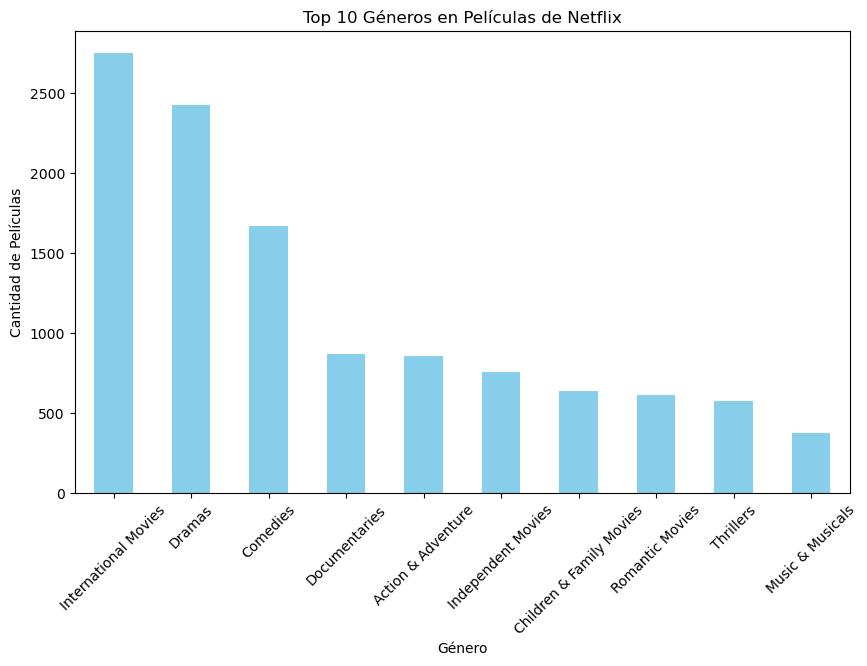

In [31]:
#ESTA ES LA ULTIMA DE ANALISIS DE TENDENCIAAAA, HASTA ACA LLEGA
peliculas = df[df['type'] == 'Movie']


generos_peliculas = peliculas['listed_in'].str.split(', ', expand=True).stack().value_counts()

# Mostrar el Top 10 de géneros favoritos de las películas
print("Top 10 géneros más populares en Películas de Netflix:")
print(generos_peliculas.head(10))

# Hacemos la visualiacionn
plt.figure(figsize=(10, 6))
generos_peliculas.head(10).plot(kind='bar', color='skyblue', title='Top 10 Géneros en Películas de Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()


Distribución de sentimientos en las descripciones:
sentimiento
Positivo    4551
Negativo    2658
Neutral     1598
Name: count, dtype: int64


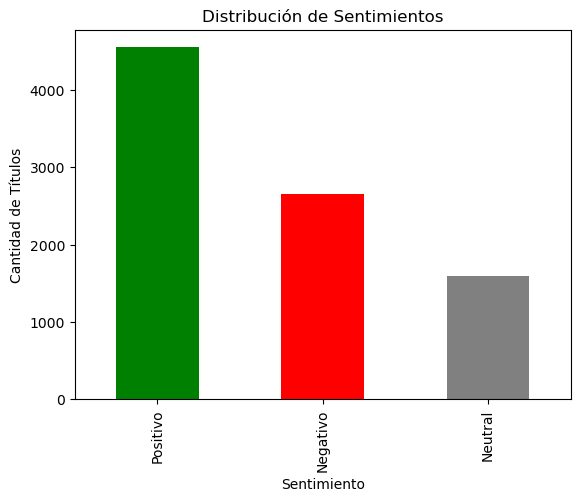

In [6]:
# ANALISIS DE SENTIMIENTOOO

from textblob import TextBlob
# esta importación tiene un lexico de polaridad que identifica la positividad o negatividad de las palabras, y despues se aca un promedio
df = pd.read_csv('netflix_titles.csv')
def obtener_sentimiento(texto):
    
    if pd.isna(texto):  
        return "Neutral"
    analisis = TextBlob(texto)
    if analisis.sentiment.polarity > 0:
        return "Positivo"
    elif analisis.sentiment.polarity < 0:
        return "Negativo"
    else:
        return "Neutral"

df['sentimiento'] = df['description'].apply(obtener_sentimiento)
print("Distribución de sentimientos en las descripciones:")
print(df['sentimiento'].value_counts())

df['sentimiento'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], title="Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Títulos")
plt.show()

# como conclusión podemos decir que 4551 descripciones de Netflix tienen un tono positivo, esto quiere decir que tienden a resaltar caracteristicas atractivas de las pelicluas o series, pueden ser de emocion, aventuras, etc
# 2658 de ella son negativas, esto quiere decir que las descripciones son negativas, esto puede ser más comun en las peliculas de terror, documentales, o dramas, que suelen tener partes de la peliculas o tramas más serias
#Y 1598 neutrales, que no son ni postivas ni negativas, que pueden ser pelicluas o series informativas, como national geographic o cosas de ese estilo